<a href="https://colab.research.google.com/github/ayush9304/HotelBookingAnalysisEDA/blob/main/EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis

##### **Project Type**    - EDA
##### **Contribution**    - Individual

##### **Team Member 1 - Ayush Kumar**

# **Project Summary -**

The hotel industry is one of the most prominent industries in the world, and with the increase in competition, it has become increasingly important to analyze data to better understand customers and optimize revenue and improve customer satisfaction. The Hotel Booking Dataset EDA project aimed to provide insights into the trends and patterns within the hotel booking industry using a hotel booking dataset.

The dataset contained information on hotel bookings from two different hotels (City & Resort Hotels), including booking information, customer demographics, and hotel details etc for three years (2015, 2016 & 2017).

After loading the dataset, I started with data preparation and cleaning before I moved to EDA to analyse it. The dataset has around 119,390 records (rows) with 32 features (columns). Out of which, there were 31994 duplicate data, so deleted those rows. Remaining number of rows was 87396.Now 4 columns (company, agent, country & children) out of 32 had missing values. I imputed them in following manner:


*   **Company**: There may be some cases when customer didn't booked hotel via any company. Hence I will replace null values with 0.
*   **Agent**: Similarly there can be bookings made without any agent, hence replaced them with 0.
*   **Children**: Children column is numeric and skewed, hence choose median for imputing missing values.
*    **Country**: country column is categorical column. We use mode of ‘country’ column, But it can lead to bias towards a specific country that occurs most frequently in the data. Hence I created a new category ‘others’ for missing values.

There were 166 rows with 0 adults, children and babies which seems unlikely hence dropped those rows. Then created new column for **total_guest = (adults + children)**. Ignored babies because generally they are not charged. Some values in ‘adr’ were negative, which must be an error so imputed them with median since it was a skewed data. Created new column for **total_stays_night = (weekend_nights + week_nights)** to analyze average length of stay.Assigned appropriate data types for some columns.

After cleaning the dataset, various exploratory data analysis techniques were used to better understand the dataset.
Three broad categories for EDA are: Univariate, Bivariate, Multivariate

I used different types of charts and metrics to visualize the relationships, trands, understand preferences etc. to better understand the data.
Some of them are:


*   Pie charts for:
    *   Proportion of bookings for different hotel types.
    *   Proportion of cancellations.
    *   Cancellations by Deposite type
    *   Bookings by Distribution channels
    *   Meals preferences
    *   Repeated Guests etc.
*   Bar charts for:
    *   Monthly Bookings
    *   Monthly Cancellations
    *   Country-wise Bookings
    *   Bookings by Market Segments
    *   Demand for Car Parking Space etc.
    *   Previous Cancellations and is cancelled
*   Histogram charts for:
    *   ADR distribution
    *   Lead time distribution
*   Line chart for:
    *   ADR trend by months
*   Scatter plots for:
    *   Lead time vs cancellations
*   Stacked Bar charts:
    *   Cancellations by Market Segments
    *   Repeated Guests by Distribution Channel
*   Box plot for:
    *   ADR distribution
*   Heatmap for:
    *   Correlation of features


Overall, the Hotel Booking Dataset EDA project provided valuable insights into the hotel booking industry, including customer preferences, booking patterns, and trends over time. These insights can help hotels optimize revenue and improve customer satisfaction by tailoring their services to meet customer needs and expectations.

# **GitHub Link -**

[https://github.com/ayush9304/HotelBookingAnalysisEDA](https://github.com/ayush9304/HotelBookingAnalysisEDA)

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Hotel booking is a big business in tourism industry. The objective of Hotel booking analysis is to understand the factors that influence bookings and to identify optimal booking patterns for the city and resort hotels. The hotel industry is highly competitive and customers have a wide range of options to choose from, making it crucial for hotel managers to understand customer preferences and booking behavior. Additionally, hotels must also meet the expectations of guests and provide quality services to maintain customer loyalty.

In thos project I'll explore and analyze hotel booking data to identify important factors that govern bookings, such as peak booking times, average length of stay, and customer types etc. I will use this information to inform business decisions around pricing, and other strategies that can help maximize revenue and improve customer satisfaction. The results of our analysis can help hotel managers optimize their operations and services to better meet the needs of customers and achieve business success in the highly competitive hotel industry.

#### **Define Your Business Objective?** 

To identify the key factors that influence bookings and to optimize booking patterns for the city and resort hotels in order to maximize revenue and improve customer satisfaction.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]







# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

### Dataset Loading

In [4]:
dataset = pd.read_csv("https://raw.githubusercontent.com/ayush9304/HotelBookingAnalysisEDA/main/Hotel%20Bookings.csv")

### Dataset First View

In [5]:
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [6]:
dataset.shape

(119390, 32)

### Dataset Information

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].shape

(31994, 32)

### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<AxesSubplot:>

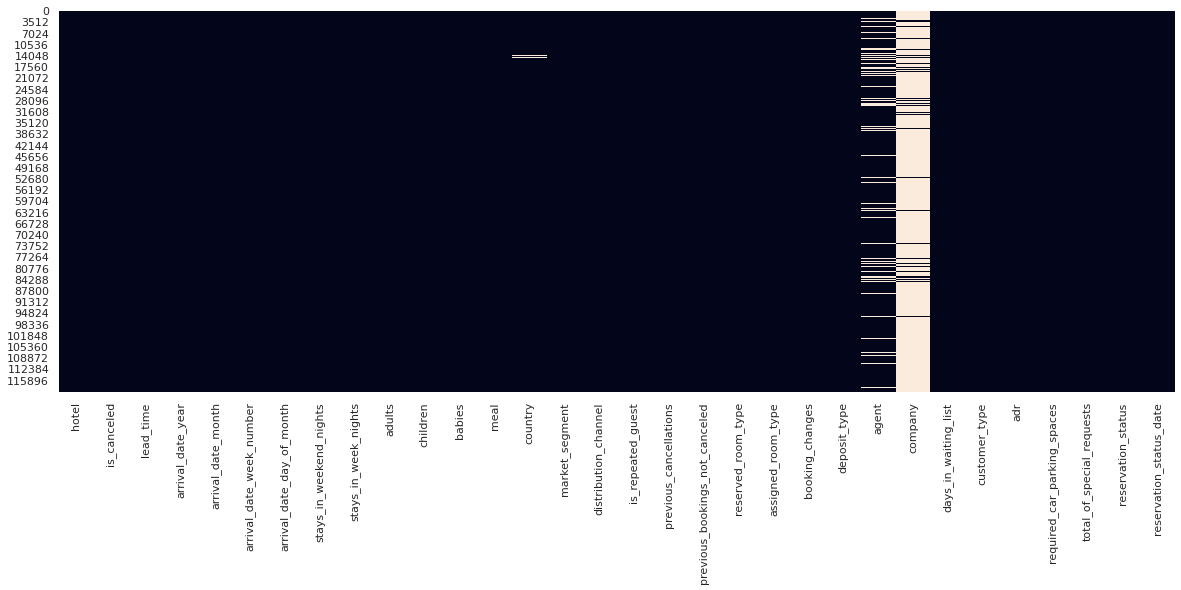

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(20,7))
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

The Hotel Booking Dataset contains booking information for city and resort type hotels mainly in the years 2015, 2016 and 2017. It includes information like when the booking was made, length of stay, the number of adults, children and babies, and the number of available parking spaces, meals etc. All personally identifying information has been removed from the data.

This dataset contains more than 119,000 rows and 32 columns of the data. It has many missing values as well.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
# Dataset Describe
dataset.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Variables Description

* **Hotel                :**Types of hotel (H1: Resort Hotel, H2:City Hotel)

* **is_cancelled         :**If the booking was cancelled(1) or not(0)

* **lead_time            :**Number of days that elapsed b/w the entering date of the booking into the PMS and the arrival time

* **arrival_date_year            :**Year of arrival date

* **arrival_date_month           :**Month of arrival Date

* **arrival_date_week_number        :**Week number of arrival date

* **arrival_date_day             :**Day of arrival date

* **stays_in_weekend_nights**         :Number of weekend nights

* **stays_in_week_nights**         :Number of week nights

* **adults**          :Number of adults

* **childern**          :Number of children

* **babies**         :Number of babies

* **meal**         :Kind of meal opted for

* **country**        :Country Code

* **market_segment**      :Which segment customer belong to

* **distribution_channel**         :How customer access the corporate booking/Direct/TA,TO

* **is_repeated_guest**         :Guest coming for first time or not

* **previous_cancellation**        :Was there a cancellation before

* **reserved_room_type**    :Type of room reserved

* **assigned_room_type**             :Type of room assigned

* **booking_changes**    :Count of changes made to booking

* **deposit_type**             :Deposit Type

* **agent**    :Booked through agent

* **days_in_waiting_list**             :Number of days in waiting list

* **customer_type**    :Type of customer

* **required_car_parking**             :If car parking is required

* **total_of_special_req**    :Number of special requirements

* **reservation_status**             :Status of Reservation

* **reservation_status_date**    :Date of specific status

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  hotel is 2
No. of unique values in  is_canceled is 2
No. of unique values in  lead_time is 479
No. of unique values in  arrival_date_year is 3
No. of unique values in  arrival_date_month is 12
No. of unique values in  arrival_date_week_number is 53
No. of unique values in  arrival_date_day_of_month is 31
No. of unique values in  stays_in_weekend_nights is 17
No. of unique values in  stays_in_week_nights is 35
No. of unique values in  adults is 14
No. of unique values in  children is 5
No. of unique values in  babies is 5
No. of unique values in  meal is 5
No. of unique values in  country is 177
No. of unique values in  market_segment is 8
No. of unique values in  distribution_channel is 5
No. of unique values in  is_repeated_guest is 2
No. of unique values in  previous_cancellations is 15
No. of unique values in  previous_bookings_not_canceled is 73
No. of unique values in  reserved_room_type is 10
No. of unique values in  assigned_room_type is 12
No. of unique

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Create a copy of the current dataset and assigning to df
df=dataset.copy()
df.shape

(119390, 32)

In [15]:
# Dropping duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(87396, 32)

In [16]:
# Columns having missing values.
df.isna().sum().sort_values(ascending = False)[:7]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
booking_changes           0
dtype: int64

Since, **company** and **agent** columns numeric data (company number, agent number). There may be some cases when customer didn't booked hotel via any agent or via any company. Hence we will replace null values by 0 in these columns.

In [17]:
df[['company','agent']] = df[['company','agent']].fillna(0)

In [18]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


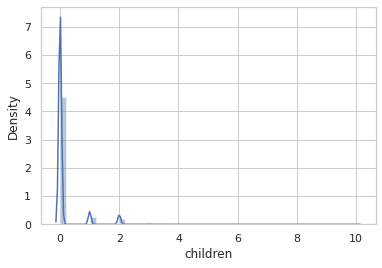

In [19]:
_ = sns.distplot(df['children'])

Since children column is numeric and skewed, we'll choose median for imputing missing values

In [20]:
df['children'].fillna(df['children'].median(), inplace = True)

In [21]:
# Getting unique Countries
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

Now **country** column represents the country of origin of customer. Since, this is categorical column , we can replace the missing value with the mode of 'country' column. But it can lead to bias towards a specific country that occurs most frequently in the data.

So we'll create a new category **others** for missing values

In [22]:
df['country'].fillna('others', inplace = True)

In [23]:
# Checking if all null values are removed
df.isna().sum().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

In [25]:
# Assigning appropriate datatypes
df[['children', 'agent', 'company']] = df[['children', 'agent', 'company']].astype('int64')
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format = '%Y-%m-%d')

In [26]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

Here we see there are rows with 0 adults, so possibly means either **children** or **babies** or **both**, which seems unlikely.

In [27]:
# Number of rows with no person (adult/children/babies)
df[df['adults']+df['babies']+df['children'] == 0].shape

(166, 32)

In [28]:
# Removing rows with zero person (adult/children/babies)
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

In [29]:
# Creating new column for total_guest = (adults + children)
# Ignoring babies cuz generally they are not charged
df['total_guests'] = df['adults'] + df['children']

In [30]:
df['adr'].describe()

count    87230.000000
mean       106.518031
std         54.891227
min         -6.380000
25%         72.250000
50%         98.200000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

In [31]:
print("ADR Mean:", df['adr'].mean())
print("ADR Median:", df['adr'].median())
print("ADR Mode:", df['adr'].mode())

ADR Mean: 106.51803072337499
ADR Median: 98.2
ADR Mode: 0    0.0
dtype: float64


In [32]:
# We see that min value of adr is negative, which must be an error so lets impute them with median since it is skewed data
df.loc[(df['hotel']=='Resort Hotel') & (df['adr']<=0), 'adr'] = df[df['hotel']=='Resort Hotel']['adr'].median()
df.loc[(df['hotel']=='City Hotel') & (df['adr']<=0), 'adr'] = df[df['hotel']=='City Hotel']['adr'].median()

In [33]:
df['adr'].describe()

count    87230.000000
mean       108.298287
std         52.932231
min          0.260000
25%         74.800000
50%         99.000000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

In [34]:
# Avg daily rate for different type hotels
df.groupby('hotel').agg({'adr':['mean', 'median']})

adr       
                    mean median
hotel                          
City Hotel    113.155644  105.3
Resort Hotel  100.677519   79.5

In [35]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [36]:
# Avg daily rate variation over the year
d = df.groupby('arrival_date_month').agg({'adr':['mean','median']}).reset_index()
d['arrival_date_month'] = pd.Categorical(d['arrival_date_month'], categories=months, ordered=True)
d.sort_values('arrival_date_month', inplace=True)
d

arrival_date_month         adr         
                             mean   median
4             January   72.390339   71.690
3            February   76.856278   75.000
7               March   83.391808   79.200
0               April  105.053467   99.450
8                 May  112.818104  110.000
6                June  121.183842  117.000
5                July  137.071875  129.000
1              August  152.293749  140.350
11          September  114.318451  109.675
10            October   92.945132   89.400
9            November   75.399091   74.690
2            December   84.836921   79.000

In [37]:
# Adding total stay columns to analyse avg length of stay
df['total_stays_night'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [38]:
# Avg length of stay for different type hotels
df.groupby('hotel')['total_stays_night'].mean()

hotel
City Hotel      3.141945
Resort Hotel    4.391948
Name: total_stays_night, dtype: float64

As expected, people generally stays longer in resorts

In [39]:
# Avg length of stay variation over the year
d = df.groupby('arrival_date_month')['total_stays_night'].mean().reset_index()
d['arrival_date_month'] = pd.Categorical(d['arrival_date_month'], categories=months, ordered=True)
d.sort_values('arrival_date_month', inplace=True)
d

,arrival_date_month,total_stays_night
4,January,3.167556
3,February,3.203354
7,March,3.390172
0,April,3.442785
8,May,3.477109
6,June,3.855209
5,July,4.210694
1,August,4.161359
11,September,3.768333
10,October,3.311805


People generally stays longer in July and August

In [40]:
# Special Requests by customer type
df.groupby("customer_type")['total_of_special_requests'].mean()

customer_type
Contract           0.838278
Group              0.648799
Transient          0.732348
Transient-Party    0.458519
Name: total_of_special_requests, dtype: float64

In [41]:
df.groupby("customer_type")['customer_type'].count()

customer_type
Contract            3135
Group                541
Transient          71862
Transient-Party    11692
Name: customer_type, dtype: int64

Seems like although **contract** customer types are one of the minorities but make more special requests per booking.

In [42]:
# Separating and creating different dataframes of both the hotel types
# which will be helpful in furthur visualizations for different hotel types seperately
resort_df = df [df.hotel == "Resort Hotel"]
city_df= df [df.hotel == "City Hotel"]

### What all manipulations have you done and insights you found?

First of all, there were alot of duplicate data (around 32k) were there so I deteted them and then coumns like 'company' and 'agent' had alot of missing data maybe because those customer didn't booked using any agent or company so I filled them with 0 (agent/company id). Also there were rows with 0 adults,babies & childrens that can't be true so I deleted those rows. In countries there were alot of missing values, to fill those I used new category 'other' instead of mode to avoid bias towards country with large number of customers. Also created a new column 'total_stays_night' to get insight of duration of stays and 'total_guests' (adult+children), here I ignored babies to calculate total_guests because generally babies are not charged. After that  I found out that 'adr' or avg. daily rate had some zeros and negative values is must be an error and the adr data was right skewed so I replaced those values with median of different hotel types.

Although visualization is better to get insight of the data that will be done in next section, I tried to understand variation in duration of stays, customer generally stays longer in resort hotels compared to city (as expected) and on average people stays longer in July and August. Now for customer_type and special request, I got to know that even though contract customers are alot less in number compared to Transient & Transient-Party they make more special requests per booking.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Chart - 1 - Pie Chart on hotel Variable

Text(0.5, 1.0, 'Percentage shares of bookings by hotel types')

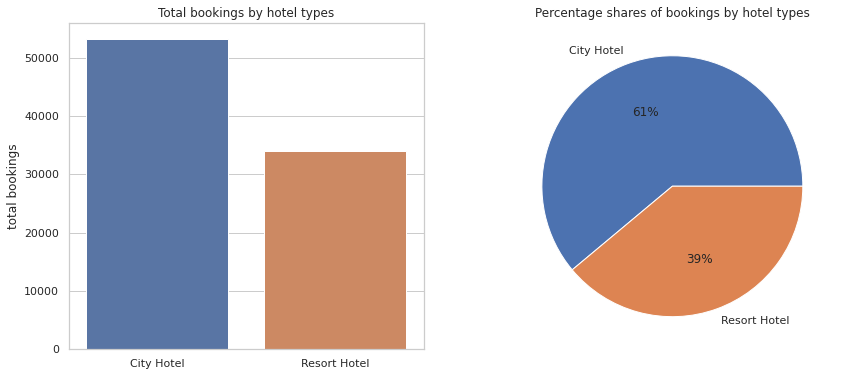

In [43]:
d = df['hotel'].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=d.index, y=d)
plt.title("Total bookings by hotel types")
plt.ylabel("total bookings")

plt.subplot(1,2,2)
p = plt.pie(d, labels=d.index, autopct="%.0f%%")
plt.title("Percentage shares of bookings by hotel types")

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. To show the total number of bookings with respect to different hotels, I have used Bar Chart.

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the 'hotel' variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are around 52k bookings in City Hotels which is 61% of total bookings in the dataset, similarly around 34k bookings (39%) in Resort Hotels.

##### 3. Will the gained insights help creating a positive business impact?

The above insight can be useful for making informed decisions about marketing strategies and resource allocation. For example, if a hotel chain is looking to expand its presence in a particular region, this information can help guide their decision about whether to invest in building a City hotel or a Resort hotel in that region based on the existing booking trends.

### Chart - 2 - Pie Chart on is_canceled and deposit_type Variable

Text(0.5, 1.0, 'Cancellations percentage')

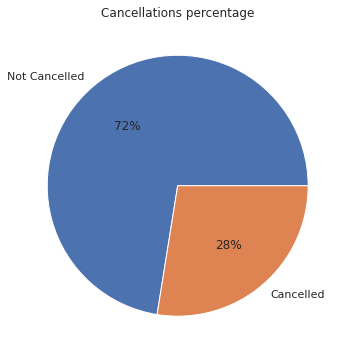

In [44]:
# Cancellations percentage
plt.figure(figsize=(6,6))
d = df['is_canceled'].value_counts()
p = plt.pie(d, autopct="%.0f%%", labels=['Not Cancelled', 'Cancelled'])
plt.title("Cancellations percentage")

Text(0.5, 0.05, 'Total cancellation percentage : 28%')

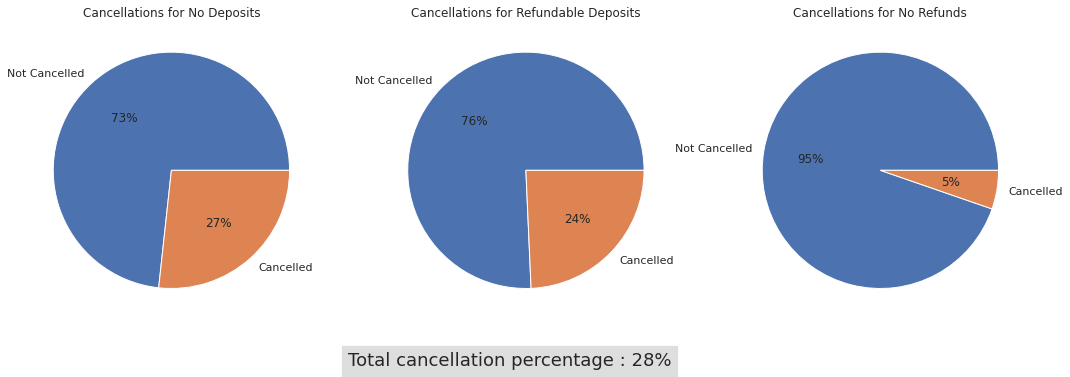

In [45]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
d = df[df['deposit_type']=='No Deposit']['is_canceled'].value_counts()
p = plt.pie(d, autopct="%.0f%%", labels=['Not Cancelled', 'Cancelled'])
_ = plt.title("Cancellations for No Deposits")

plt.subplot(1,3,2)
d = df[df['deposit_type']=='Refundable']['is_canceled'].value_counts()
p = plt.pie(d, autopct="%.0f%%", labels=['Not Cancelled', 'Cancelled'])
_ = plt.title("Cancellations for Refundable Deposits")

plt.subplot(1,3,3)
d = df[df['deposit_type']=='Non Refund']['is_canceled'].value_counts()
p = plt.pie(d, autopct="%.0f%%", labels=['Not Cancelled', 'Cancelled'])
_ = plt.title("Cancellations for No Refunds")

# We know total cancellation percentage from previous graph
plt.figtext(0.5, 0.05, "Total cancellation percentage : 28%", ha="center", fontsize=18, bbox={"facecolor": "lightgray", "alpha": 0.75, "pad": 7})

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the 'is_canceled' variable for different deposit types.

##### 2. What is/are the insight(s) found from the chart?

I got to know that around 28% of all bookings in the dataset are cancelled. In the pie chart above I see that similar cancellations are done in bookings where customer will get the money back (i.e., refundable and no deposit). Compared to this very small percentage of people (5%) cancels their bookings when they can't get their money back.

##### 3. Will the gained insights help creating a positive business impact?

Yes, this insight can help in creating a positive business impact as it highlights the importance of implementing non-refundable deposit policies. By implementing such policies, hotels can reduce the number of cancellations and secure revenue. This can also help in better management of room inventory and pricing strategies. Additionally, hotels can offer incentives to customers who book non-refundable reservations, such as discounts or other perks. Overall, this insight can aid hotels in optimizing their revenue management strategies and improving their profitability.

### Chart - 3 - Scatter Chart on lead_time and is_canceled Variable

Text(0.5, 1.0, 'Effect of Lead time on Cancellations')

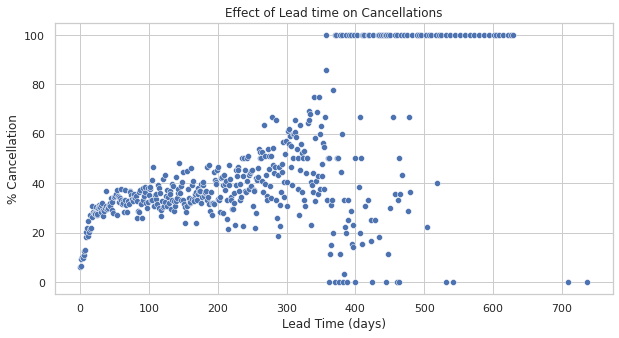

In [46]:
# Effect of lead time on cancellations

d = df.groupby('lead_time')['is_canceled'].mean().reset_index().rename(columns={'is_canceled': '%_cancelled'})
d['%_cancelled'] *= 100
plt.figure(figsize=(10,5))
sns.scatterplot(x='lead_time', y='%_cancelled', data=d)
plt.xlabel("Lead Time (days)")
plt.ylabel("% Cancellation")
plt.title("Effect of Lead time on Cancellations")

##### 1. Why did you pick the specific chart?

A scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.

Thus, I have used the scatter plot to depict the relationship between lead_time and % cancellation.

##### 2. What is/are the insight(s) found from the chart?

Bookings having less lead time are less often cancelled whereas high lead time bookings are more often cancelled. It shows positive correlation.

One thing to note that there is high concentration of dots at 100% after 400 lead days, which means most of the bookings made with more than 400 lead days are likely to get cancelled.

##### 3. Will the gained insights help creating a positive business impact?

Based on this positive correlation, businesses can take steps to reduce the lead time between booking and actual stay. For example, they can offer more last-minute deals or promotions to encourage customers to book closer to their actual stay date. This can help reduce cancellations and increase customer satisfaction. Alternatively, businesses can also implement policies that allow customers to easily cancel or modify their bookings without penalty if they are made far in advance, to help reduce the risk of cancellations.

### Chart - 4 - Bar Chart on hotel bookings and cancellations by months

Text(0.5, 1.0, 'Bookings by months')

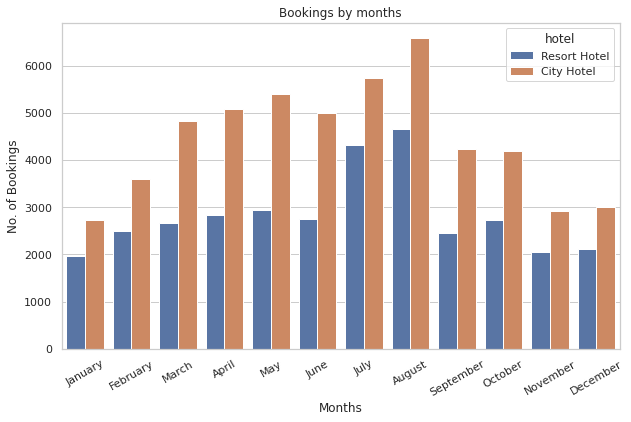

In [47]:
# Total bookings for different hotels over months
plt.figure(figsize=(10,6))
sns.countplot(x='arrival_date_month', hue='hotel', data=df, order=months)
p = plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("No. of Bookings")
plt.title("Bookings by months")

Text(0.5, 1.0, 'Cancellations by months')

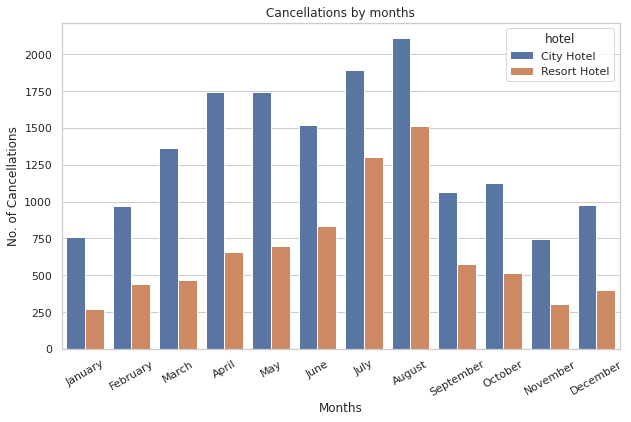

In [48]:
# Total cancellations for different hotels over months
d = df.groupby(["arrival_date_month", "hotel"])["is_canceled"].sum().reset_index().rename(columns={'is_canceled':'total_cancelled'})
plt.figure(figsize=(10,6))
sns.barplot(x='arrival_date_month', y='total_cancelled', hue='hotel', data=d, order=months)
p = plt.xticks(rotation=30)
plt.xlabel("Months")
plt.ylabel("No. of Cancellations")
plt.title("Cancellations by months")

##### 1. Why did you pick the specific chart?

The bar graph can be used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time. When the changes are larger, a bar graph is the best option to represent the data.

Thus, I have used the bar graph to show the bookings and cancellations for both hotel types over different months of the year.

##### 2. What is/are the insight(s) found from the chart?

For both hotel types, November, December, January, February (winter months) have less bookings compared to mid-year (or summer) months which has more bookings.

Graphs for total_bookings and total_cancellations for both hotel types are similar which means with more number of bookings, more are the cancellations.



##### 3. Will the gained insights help creating a positive business impact?

Yes, it could help hotels better allocate resources and staffing during different seasons of the year to make more profit and spend money efficiently. For example, during the summer months, hotels may need to hire additional staff to handle the higher volume of bookings.

### Chart - 5 - Average Daily rate over months

Text(0.5, 1.0, 'Average Daily rate by months')

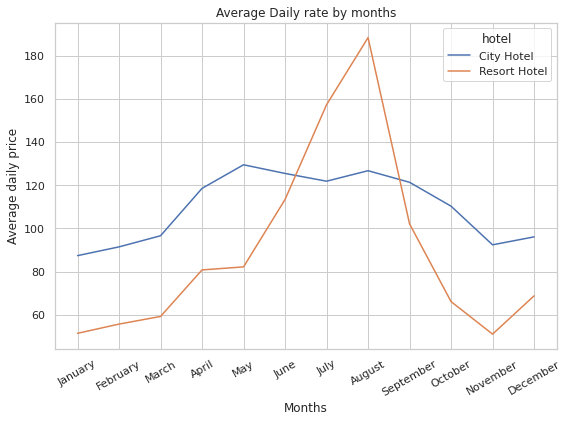

In [49]:

d = df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
d['arrival_date_month'] = pd.Categorical(d['arrival_date_month'], categories=months, ordered=True)
d.sort_values('arrival_date_month', inplace=True)

plt.figure(figsize=(9,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=d)
plt.ylabel("Average daily price")
plt.xlabel("Months")
p = plt.xticks(rotation=30)
plt.title("Average Daily rate by months")

##### 1. Why did you pick the specific chart?

Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time.

Thus, I have used the line chart to show the average daily rate for both hotel types over different months of the year.

##### 2. What is/are the insight(s) found from the chart?

I see that adr is higher in summer months and lower in winter months, and I already saw the similar pattern in total bookings over months as well. It also reflects very simple market principle i.e., more demand more price and less demand less price.

##### 3. Will the gained insights help creating a positive business impact?

It can help create a positive business impact as it indicates that the hotel may be able to charge higher rates during the summer months when demand is higher. The hotel could consider adjusting their pricing strategy to take advantage of this trend and potentially increase revenue. However, it's important to also consider other factors such as competition, market trends, and customer behavior before making any pricing decisions.

### Chart 6 - Bookings by country

In [50]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'others', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA

Text(0.5, 1.0, 'Top 20 countries by number of guests')

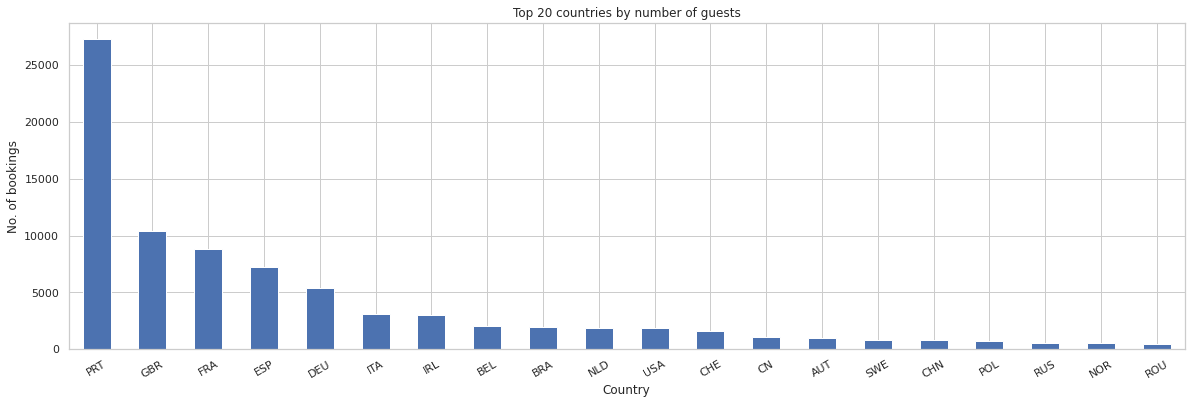

In [51]:
# Top 20 countries by number of bookings
d = df['country'].value_counts()
plt.figure(figsize=(20,6))
d.sort_values(ascending=False)[:20].plot(kind='bar')
p = plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("No. of bookings")
plt.title("Top 20 countries by number of guests")

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels.
Thus, to show the total number of bookings with respect to different countries, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

The country of Portugal (PRT) has significantly higher number of bookings compared to any other countries. Next major countries are GBR, FRA, ESP etc. Most of the top countries are europian contries.

##### 3. Will the gained insights help creating a positive business impact?

Yes, the hotel managements can focus more on the needs and preferences of customers from the top booking countries. They can analyze the common trends and requirements of customers from these countries and tailor their services accordingly, which may increase customer satisfaction and lead to repeat business. Additionally, the hotel can invest more in marketing and promotional activities in these countries to attract more customers from these markets.

### Chart 7 - Bookings over different market segment

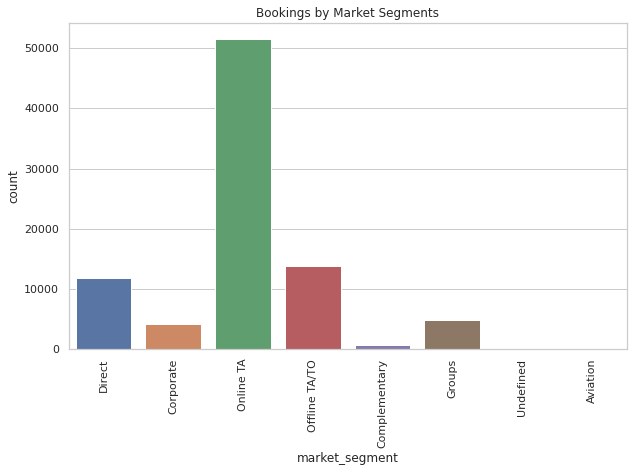

In [52]:
plt.figure(figsize = (10,6))
plt.title("Bookings by Market Segments")
ax = sns.countplot(x = "market_segment", data = df)
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the total number of bookings with respect to different market segments, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Indirect bookings through travel agents (specially Online) are higher compared to other bookings like direct, corporate, group etc.

##### 3. Will the gained insights help creating a positive business impact?

This insight can help create a positive business impact in many ways like, the hotel can allocate more resources towards marketing and advertising efforts targeting the travel agent market segment, as it has the highest number of bookings. This can help attract more customers from this segment and increase revenue. Additionaly the hotel can also evaluate its commission rates and partnerships with various travel agencies to ensure that it is maximizing profits from the various market segments.

### Chart 8 - Cancellations over different market segment

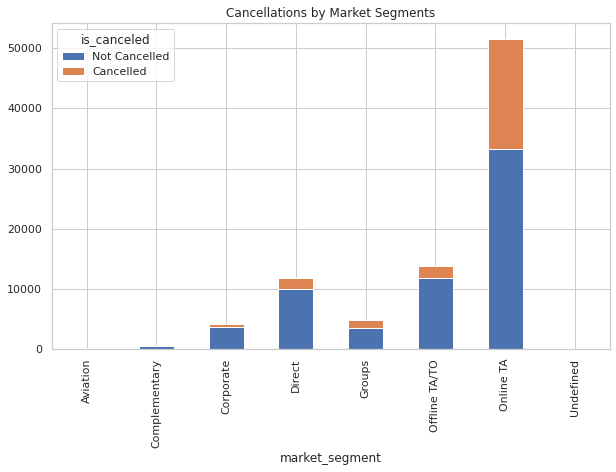

In [53]:
d = df.groupby(['market_segment', 'is_canceled'])['hotel'].count().unstack().rename(columns={0: "Not Cancelled", 1: "Cancelled"})

_ = d.plot(kind='bar', stacked=True, figsize=(10, 6))
_ = plt.title("Cancellations by Market Segments")

##### 1. Why did you pick the specific chart?

A stacked bar graph is a type of bar chart that is used to display the relative proportions of different categories in a dataset. Each bar is divided into segments, with each segment representing a different category or subgroup. The segments are stacked on top of each other, with the total height of the bar representing the total size of the dataset.

##### 2. What is/are the insight(s) found from the chart?

We see that Online TA has highest proportion of cancellations (around 35%) but at the same time number of non cancelled bookings are also the highest for Online TA. Cancellation proportions for other segments are less.

##### 3. Will the gained insights help creating a positive business impact?

This can help businesses understand the cancellation behavior of different market segments. If a business relies heavily on the online TA market segment and experiences a high cancellation rate, they may want to explore the reasons behind the cancellations and try to address them to reduce the impact on their revenue. On the other hand, if a business has a lower cancellation rate in the offline TA/TO or direct market segments, they may want to focus more on these segments to increase their revenue stability.

### Chart 9 - Correlation Heatmap

<AxesSubplot:>

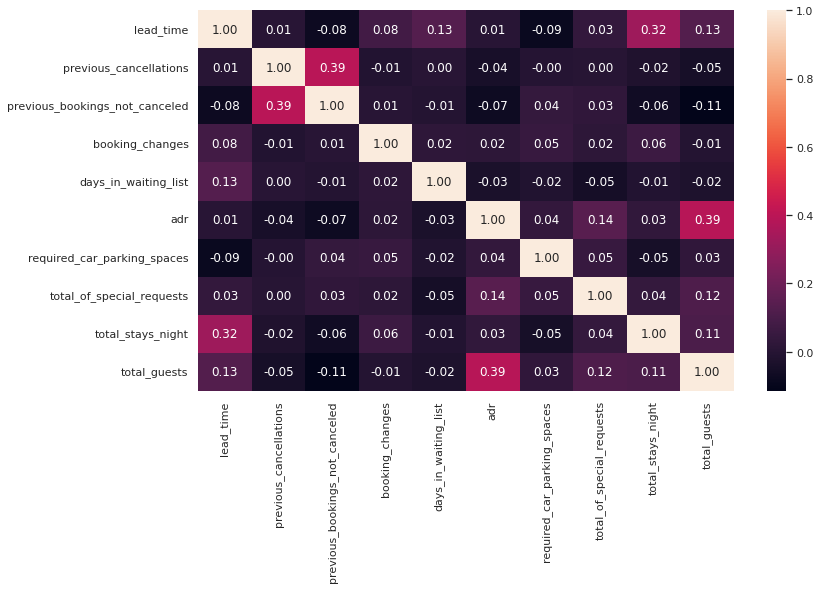

In [54]:
# Numeric columns to consider for correlation map
num_cols = df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stays_night','total_guests']]

corr = num_cols.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corr, annot = True, fmt='.2f')

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, I used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

lead_time and total_stays_night have little correlation. This may indicates that people who wants to stay longer generally plans early hence longer lead time.

adr and total_guests are also slightly correlated, which makes sense as more number of people means more cost/charges.

##### 3. Will the gained insights help creating a positive business impact?

Hotels can use this information to adjust their pricing strategies and target guests who stay for longer periods of time. They can also try to attract more guests by offering discounts or incentives for longer stays.

### Chart 10 - ADR

In [55]:
df['adr'].describe()

count    87230.000000
mean       108.298287
std         52.932231
min          0.260000
25%         74.800000
50%         99.000000
75%        134.100000
max       5400.000000
Name: adr, dtype: float64

Text(0.5, 1.0, 'Daily rate by hotel type')

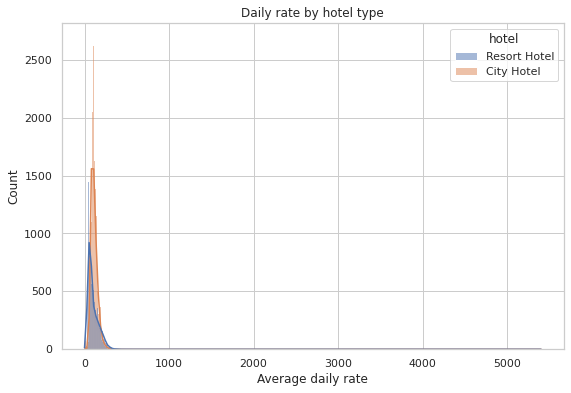

In [56]:
# Distribution of adr
plt.figure(figsize=(9,6))
sns.histplot(x='adr', hue='hotel', data=df, kde=True)
plt.xlabel("Average daily rate")
plt.title("Daily rate by hotel type")

In [57]:
df[df['adr']>5000] # Outlier

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_stays_night
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,0,0,Transient,5400.0,0,0,Canceled,2016-02-19,2,1


Text(0.5, 1.0, 'Daily Rate by hotel type')

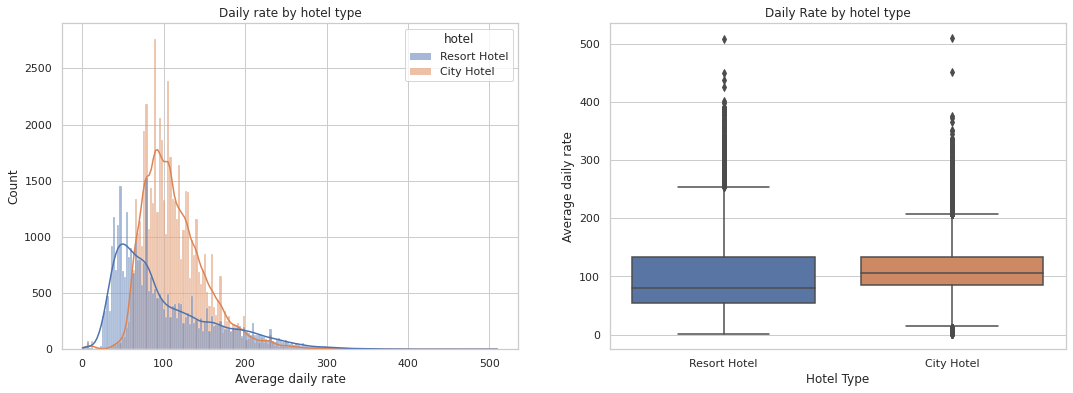

In [58]:
# Remove an outlier (adr=5400) for proper view of chart

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
d = df.drop(df[df['adr']==5400].index, axis=0, inplace=False)
sns.histplot(x='adr', hue='hotel', data=d, kde=True)
plt.xlabel("Average daily rate")
plt.title("Daily rate by hotel type")

plt.subplot(1,2,2)
df2 = df.drop(df[df['adr']==5400].index, axis=0, inplace=False)
sns.boxplot(x='hotel', y='adr', data = df2)
plt.ylabel('Average daily rate')
plt.xlabel("Hotel Type")
plt.title("Daily Rate by hotel type")

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the distributions of adr.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each hotel type in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

adr for both the hotel types are right skewed which is normal because only few rich people goes for hotels with higher adr and most people goes for cheap to medium costly hotel. Hence it is right skewed.

##### 3. Will the gained insights help creating a positive business impact?

The not necessarily indicative of a positive or negative impact on the business. However, this information can still be useful in understanding the distribution of prices and potentially identifying any outliers or areas where the business may want to focus on pricing strategies. For example, if the majority of bookings are at the lower end of the adr range, the business may want to consider offering promotions or discounts to encourage more bookings at higher price points.

### Chart 11 - Car Parking Space

Text(0.5, 1.0, 'Car Parking Spaces Demand')

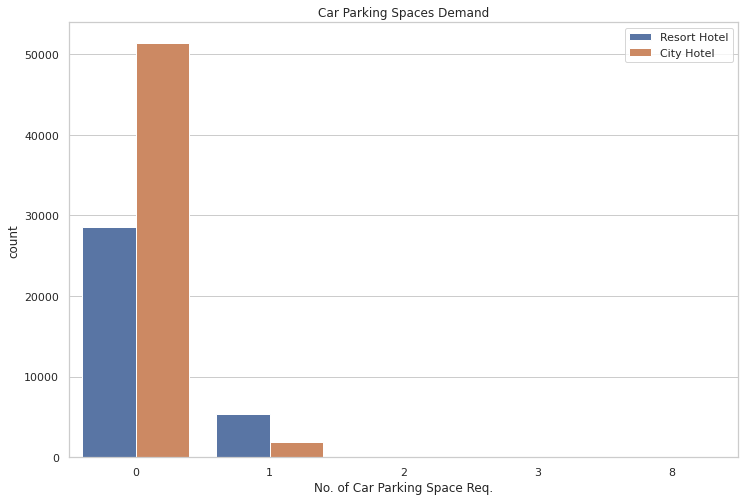

In [59]:
plt.figure(figsize = (12,8))
sns.countplot(x='required_car_parking_spaces', hue='hotel', data=df)
plt.xlabel("No. of Car Parking Space Req.")
plt.legend(loc=1)
plt.title("Car Parking Spaces Demand")

In [60]:

d = df.groupby('required_car_parking_spaces')['hotel'].count().reset_index().rename(columns={'hotel':'total_demand'})
d['demand_percentage'] = (d['total_demand']/sum(d['total_demand']))*100
d

,required_car_parking_spaces,total_demand,demand_percentage
0,0,79924,91.624441
1,1,7273,8.337728
2,2,28,0.032099
3,3,3,0.003439
4,8,2,0.002293


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the total number of bookings with respect to parking spaces needed, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

We can see that more than 91% guests don't need parking space and almost 8% guests need parking space for 1 car.

##### 3. Will the gained insights help creating a positive business impact?

In cases like if the hotel has limited parking space, knowing that the majority of bookings do not require parking could help the hotel optimize their parking resources and potentially offer them as a premium service to guests who require it. On the other hand, if the hotel has ample parking space, this insight may not have much impact on the business.

### Chart 12 - Room Types

In [61]:
# Unique room types
sorted(df['reserved_room_type'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L']

Text(0.5, 1.0, 'Types of Rooms reserved')

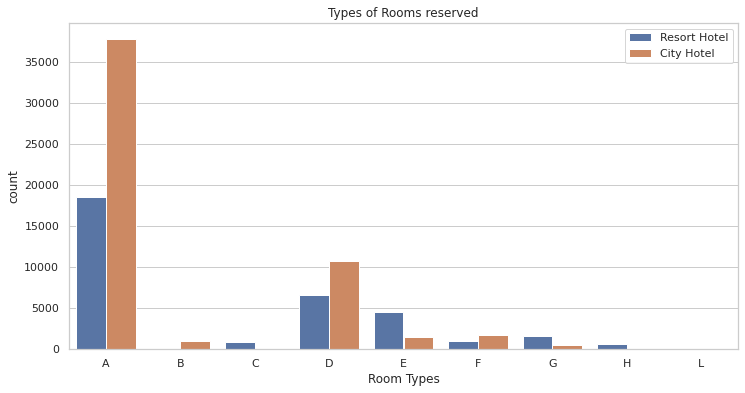

In [62]:
plt.figure(figsize = (12,6))
sns.countplot(x='reserved_room_type', hue='hotel', data=df, order=sorted(df['reserved_room_type'].unique()))
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Types of Rooms reserved")

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the total number of bookings with respect to different room types, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Most of guests reserves rooms of type 'A', also significant number of guests also reserves room type 'D' & 'E'. Demand for rest types are very minimal.

##### 3. Will the gained insights help creating a positive business impact?

Yes, this insight can help create a positive business impact. Knowing the most popular room types can help hotels optimize their inventory and pricing strategies. For example, if the hotel has limited inventory for the popular room types, they can consider increasing the prices for those rooms. On the other hand, they can promote and offer discounts for the less popular room types to attract more bookings.

Text(0.5, 1.0, 'Most Denied Room Types')

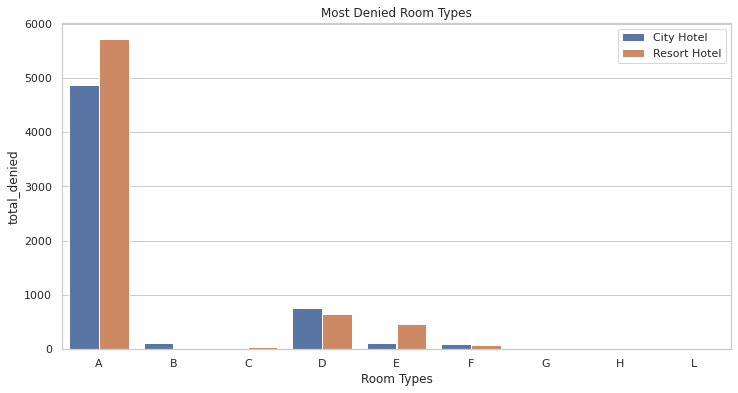

In [63]:
# Most Denied Room Types
d = df.loc[df['reserved_room_type'] != df['assigned_room_type']].groupby(['reserved_room_type','hotel'])['meal'].count().reset_index().rename(columns={'meal':'total_denied'})

plt.figure(figsize = (12,6))
sns.barplot(x='reserved_room_type', y='total_denied', hue='hotel', data=d, order=sorted(df['reserved_room_type'].unique()))
plt.xlabel("Room Types")
plt.legend(loc=1)
plt.title("Most Denied Room Types")

Obviously, Room types A, D and E have more demand hence more denials.

### Chart 13 - Top agents by number of bookings

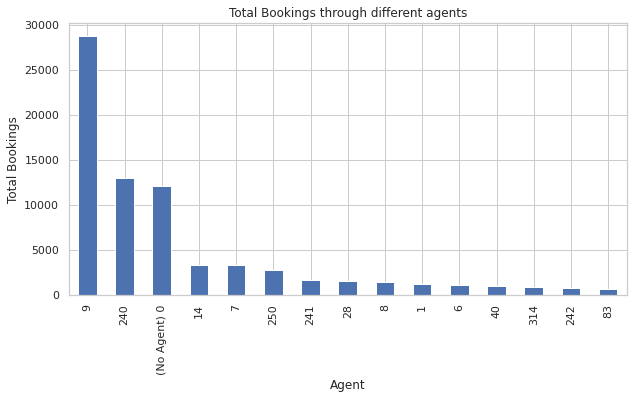

In [64]:
d = df['agent'].value_counts()
plt.figure(figsize = (10,5))
ax = d.sort_values(ascending=False)[:15].plot(kind='bar')
plt.xlabel("Agent")
plt.ylabel("Total Bookings")
plt.title("Total Bookings through different agents")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[2] = '(No Agent) 0'
_ = ax.set_xticklabels(labels)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the total number of bookings with respect to different agents, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Agent no. 9 has made most no. of bookings followed by 240, 14 etc. (ignoring 0 because I assigned NaNs (no agent or missing) with 0 previously.)

##### 3. Will the gained insights help creating a positive business impact?

The hotel management can use this information to develop targeted marketing strategies for these top agents. For example, they can offer special discounts or incentives to these agents to encourage them to bring in even more bookings. Alternatively, they can also analyze the characteristics of these bookings and guests to identify any trends or patterns that can help them improve their overall marketing and business strategies.

### Chart 14 - Special Requests by country

Text(0.5, 1.0, 'Top 50 countries by average number of special requests')

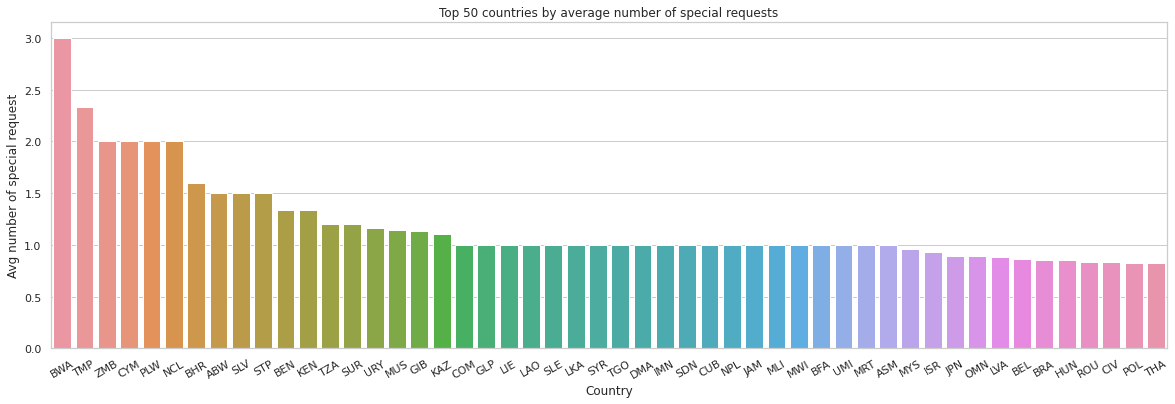

In [65]:
d = df.groupby("country")['total_of_special_requests'].mean().sort_values(ascending=False)[:50]
plt.figure(figsize=(20,6))
sns.barplot(x=d.index, y=d)
p = plt.xticks(rotation=30)
plt.xlabel("Country")
plt.ylabel("Avg number of special request")
plt.title("Top 50 countries by average number of special requests")

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the total number of special requests for different countries, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Some top countries from where customers makes most special requests are BWA, TMP, ZMB, CYM etc.

##### 3. Will the gained insights help creating a positive business impact?

Yes, it can help create a positive business impact. Lets say if the hotel knows that customers from BWA often make requests for certain types of food or amenities, they can try to accommodate those requests to provide a better customer experience and potentially attract more customers from India. Similarly, if the hotel knows that customers from TMP often make requests for certain types of room configurations or services, they can try to meet those requests to improve customer satisfaction and loyalty. By catering to the specific needs and preferences of customers from different countries, the hotel may be able to differentiate itself from competitors and attract more customers.

### Chart 15 - No. of days in advanced of booking the hotel

Text(0.5, 1.0, 'Days in advanced of booking the hotel')

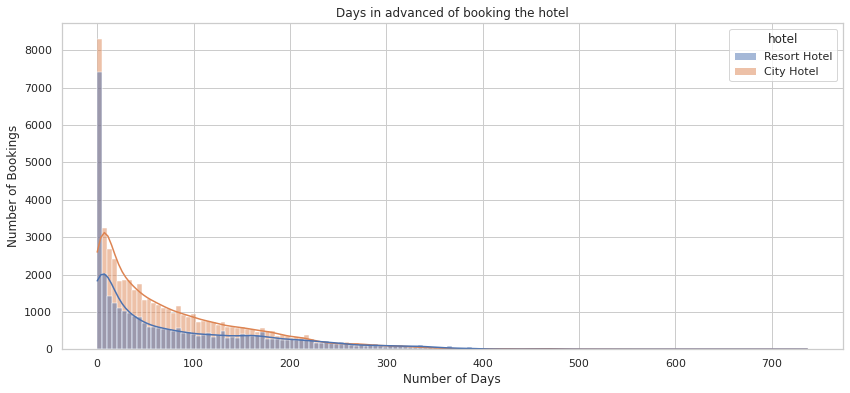

In [66]:
plt.figure(figsize=(14,6))
sns.histplot(x='lead_time', hue='hotel', data=df, kde=True)
plt.xlabel("Number of Days")
plt.ylabel("Number of Bookings")
plt.title("Days in advanced of booking the hotel")

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the distributions of lead_time.

##### 2. What is/are the insight(s) found from the chart?

The distribution of lead_time is right skewed with most bookings are made with lead time close to 0 for both hotel types.

##### 3. Will the gained insights help creating a positive business impact?

If hotel management wants to offer discounts or special offers to customers who book in advance, they can use this information to identify the customers who book at the last minute and target them specifically. Alternatively, they could use this information to create marketing campaigns that encourage customers to book early, and emphasize the benefits of doing so. 

### Chart 16 - Bookings by distribution channel

Text(0.5, 1.0, 'Bookings by distribution channel')

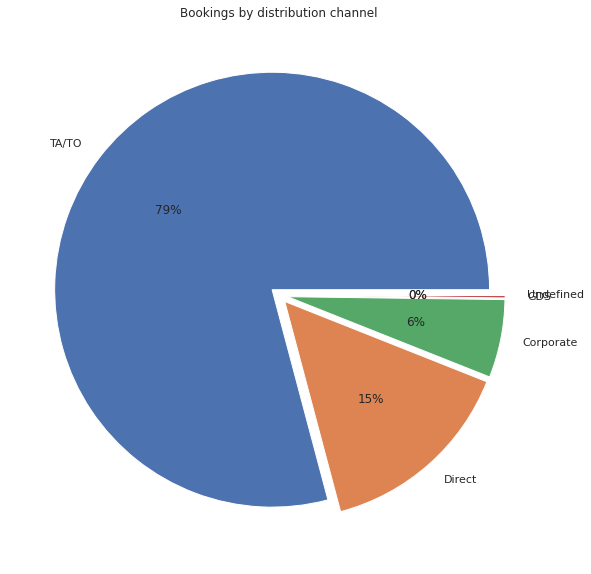

In [67]:
d = df['distribution_channel'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%", explode=[0.04]*5)
plt.title("Bookings by distribution channel")

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of bookings by different distribution channels.

##### 2. What is/are the insight(s) found from the chart?

Majority of bookings (79%) are done through TA/TO followed by Direct (15%), Corporate (6%) etc.

##### 3. Will the gained insights help creating a positive business impact?

Knowing the distribution channels can help the business in understanding where their customers are coming from and which channels are more effective in generating bookings. This can help in strategizing marketing efforts and allocating resources to the most effective channels.

### Chart 17 - Percentage of bookings with meals

In [68]:
def getMealDetails():
  return"BB: Bed and breakfast.\nFB: Full board (breakfast, lunch and dinner).\nHB: Half board (breakfast and lunch/dinner).\nSC: Room only with no meals included.\nUndefined: No meal or undefined."
print(getMealDetails())

BB: Bed and breakfast.
FB: Full board (breakfast, lunch and dinner).
HB: Half board (breakfast and lunch/dinner).
SC: Room only with no meals included.
Undefined: No meal or undefined.


Text(1, 0.45, 'BB: Bed and breakfast.\nFB: Full board (breakfast, lunch and dinner).\nHB: Half board (breakfast and lunch/dinner).\nSC: Room only with no meals included.\nUndefined: No meal or undefined.')

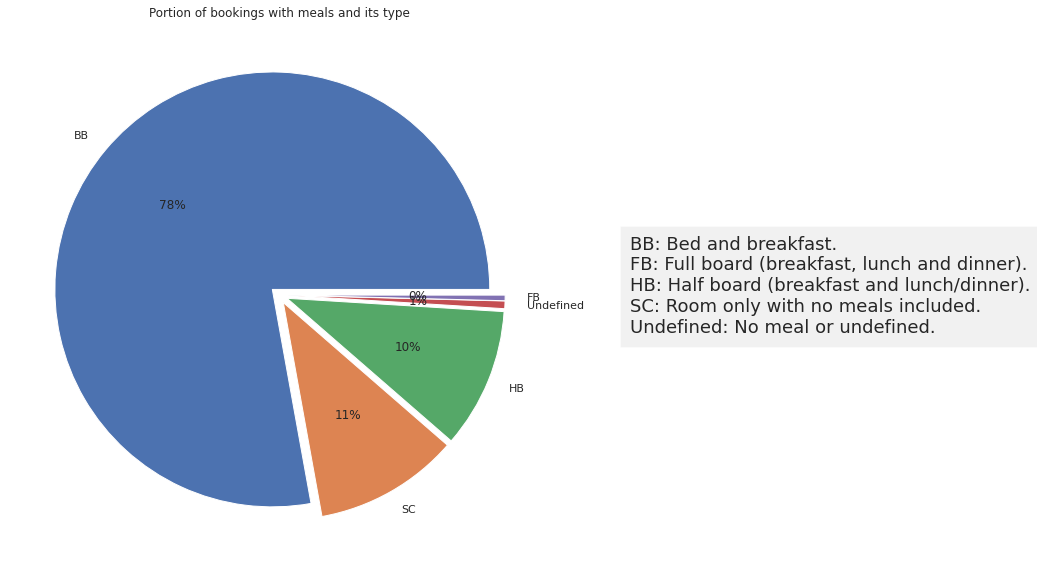

In [69]:
d = df['meal'].value_counts()
plt.figure(figsize=(10,10))
p = plt.pie(d, labels=d.index, autopct="%.0f%%", explode=[0.04]*5)
plt.title("Portion of bookings with meals and its type")

plt.figtext(1, 0.45, getMealDetails(), ha="left", fontsize=18, bbox={"facecolor": "lightgray", "alpha": 0.3, "pad": 10})

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of different meals people want.

##### 2. What is/are the insight(s) found from the chart?

SC: Room with No meals

Almost 90% of total guests books meal in their bookings, among which majority books meal of type BB (78%) followed by SC (11%), HB (10%) etc.

##### 3. Will the gained insights help creating a positive business impact?

Understanding the meal preferences of customers can help hotels to make informed decisions about their food and beverage offerings. For example, if the majority of customers prefer the Bed and Breakfast (BB) meal type, hotels can focus on improving the quality of their breakfast offerings or promoting it more heavily in their marketing campaigns.

### Chart 18 - Average Daily Rate trend over three years

In [77]:
# Functions to create date column from individual columns (day, month, year)
def get_month(x):
  pre = ''
  if months.index(x)<9:
    pre = '0'
  return pre+str(months.index(x)+1)

def get_day(x):
  pre = ''
  if x<10:
    pre = '0'
  return pre+str(x)

In [71]:
df['arrival_date'] = df.arrival_date_year.apply(lambda x: str(x))+"-"+df.arrival_date_month.apply(get_month)+"-"+df.arrival_date_day_of_month.apply(get_day)
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_stays_night,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,79.5,0,0,Check-Out,2015-07-01,2,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,79.5,0,0,Check-Out,2015-07-01,2,0,2015-07-01


Text(0.5, 1.0, 'Average daily rate trend over three years')

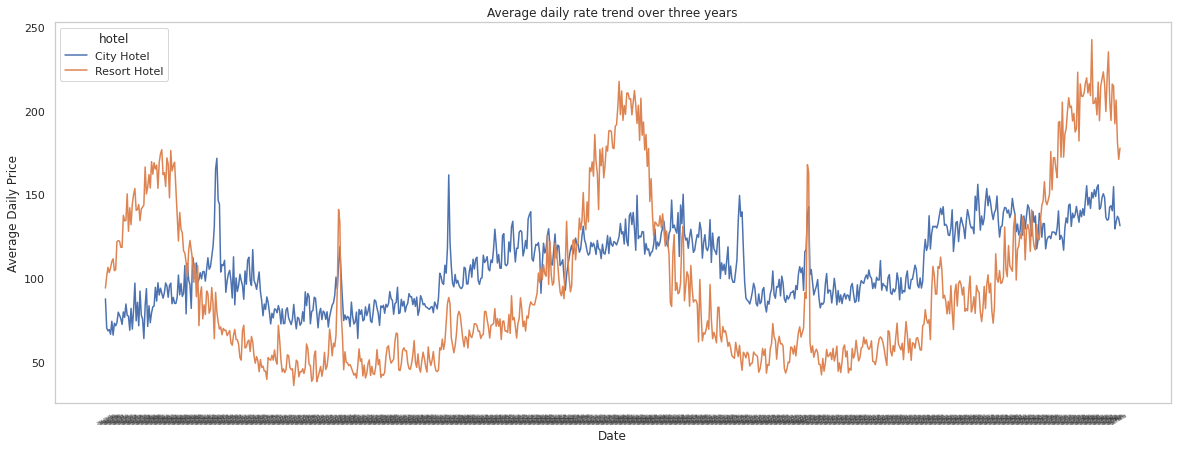

In [72]:
d = df.groupby(['hotel','arrival_date'])['adr'].mean().reset_index().sort_values('arrival_date')
# fig = plt.figure(figsize=(20,7))
fig, ax = plt.subplots(figsize=(20, 7))
sns.lineplot(x='arrival_date', y='adr', hue='hotel', data=d)
plt.xlabel("Date")
plt.ylabel("Average Daily Price")
plt.grid()
# fig.autofmt_xdate()
p = plt.xticks(rotation=30)
ax.tick_params(axis='x', labelsize=3)
plt.title("Average daily rate trend over three years")

##### 1. Why did you pick the specific chart?

Line charts are a useful tool for visualizing trends over time. It allows us in easy identification of patterns and changes over time.

Thus, I have used the line chart to show the average daily rate for both hotel types over the years.

##### 2. What is/are the insight(s) found from the chart?

Here we observe that the yearly pattern repeats every year and highest daily price (for each year) is increasing every year.

##### 3. Will the gained insights help creating a positive business impact?

Yes above insight can help hotels in determining price strategy, revenue forecast etc.

### Chart 19 - Relationship between previous cancellations and cancellation

In [73]:
print(f"PC   Counts\n{'-'*12}")
df['previous_cancellations'].value_counts()

PC   Counts
------------


0     85549
1      1405
2       110
3        61
4        30
11       27
5        19
6        17
13        4
25        2
24        2
26        1
14        1
19        1
21        1
Name: previous_cancellations, dtype: int64

Text(0.5, 1.0, 'Relationship between Previous Cancellations and Cancellation Rate')

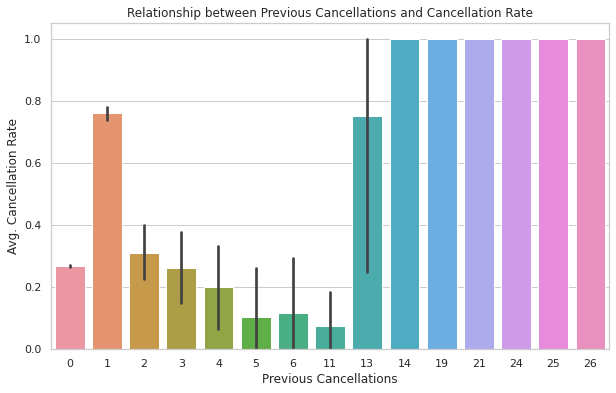

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'previous_cancellations' ,y = "is_canceled", data = df)
plt.xlabel("Previous Cancellations")
plt.ylabel("Avg. Cancellation Rate")
plt.title ('Relationship between Previous Cancellations and Cancellation Rate')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable to get some sense of relative levels. Thus, to show the average number of bookings cancelled with respect to previous cancellations, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Those who have cancelled previously once have high chance of cancellation compared to 0 previous cancellations. For higher values of previous cancellations, numbers are very less and can be ignored.

##### 3. Will the gained insights help creating a positive business impact?

Understanding the relationship between previous cancellations and cancellations could inform revenue management strategies, such as adjusting pricing or availability for these bookings.

### Chart 20 - Repeated Guests

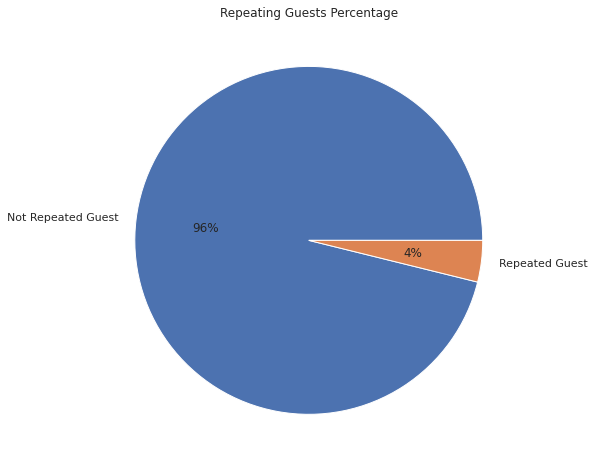

In [75]:
plt.figure(figsize=(8,8))
d = df['is_repeated_guest'].value_counts()
p = plt.pie(d, autopct="%.0f%%", labels=['Not Repeated Guest', 'Repeated Guest'])
_ = plt.title("Repeating Guests Percentage")

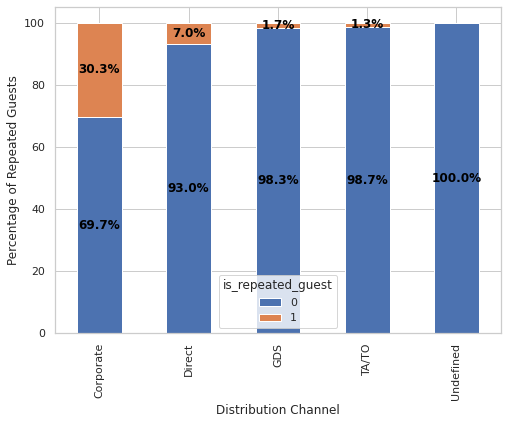

In [76]:
# Computing the number of repeated guests by distribution channel
counts = df.groupby(['distribution_channel', 'is_repeated_guest'])['is_repeated_guest'].count().unstack()

# Computing the percentage of repeated guests for each category
totals = counts.sum(axis=1)
percentages = counts.divide(totals, axis=0) * 100

# Plot the stacked bar chart with percentage labels
ax = percentages.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_xlabel('Distribution Channel')
ax.set_ylabel('Percentage of Repeated Guests')

# Adding the percentage labels on top of each bar
for i, category in enumerate(percentages.index):
    total = 0
    for j, value in enumerate(percentages.loc[category]):
        ax.text(i, total + value/2, f'{value:.1f}%', ha='center', va='center', color='black', fontweight='bold')
        total += value
        
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar graph is a type of bar chart that is used to display the relative proportions of different categories in a dataset. Each bar is divided into segments, with each segment representing a different category or subgroup. The segments are stacked on top of each other, with the total height of the bar representing the total size of the dataset.

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where different percentage comparison comes into action pie chart is used frequently.

##### 2. What is/are the insight(s) found from the chart?

Corporate has the most percentage of repeated guests.

##### 3. Will the gained insights help creating a positive business impact?

This can help hotels create targeted marketing strategies to attract more corporate guests. Hotels can offer special discounts, loyalty programs, or other incentives to encourage corporates to book with them.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

To identify the key factors that influence bookings and to optimize booking patterns for the city and resort hotels in order to maximize revenue and improve customer satisfaction.

**Solution to maximize revenue and improve customer satisfaction**
*   Implement dynamic pricing strategies to optimize room rates based on demand and trends.
*   Optimize the use of available parking space by offering discounted or free parking to customers who need it the most.
*   Expand the availability of the most popular room types (such as A, D, and E) to meet the growing demand.
*   Expand the availability of the most popular meal types (such as BB) to increase customer satisfaction.
*   Build strategic partnerships with top travel agents and tour operators to increase the number of bookings through those channels.
*   Offer personalized promotions and packages to guests based on their preferences and booking history. This can increase their satisfaction and encourage them to book with your hotel again in the future.
*   Encourage customers to leave reviews and provide feedback on their experience. Use this feedback to improve your hotel's offerings and address any areas of concern.
*   Invest more in advertisements and promotions in top countries like Portugal.




# **Conclusion**

* City Hotels have more bookings (61%) compared to Resort Hotels (39%).
* Around 28% of all bookings gets cancelled.
* Non-refundable deposits decreases significantly the chances of cancellation.
* Longer lead time increases the chances of cancellations.
* Summer months (April to August) have more bookings compared to winter months.
* Since demand is higher in summer months, adr is also higher.
* Portugal has the highest number of customers followed by Britain, France etc.
* More bookings comes through TA/TO (Online/Offline) compared to Direct, Corporates etc.
* Customers who wants to stay longer generally plans early.
* Most customers don't need parking space around 91%.
* Room Type A is the most preferred room type among customers.
* Agent no. 9 has made most no. of bookings followed by 240, 14 etc.
* Almost 90% of total guests books meal in their bookings, among which majority books meal of type BB (78%) followed by SC (11%), HB (10%) etc.
* Most of the guest stays for 1-4 days in the hotels.



* New guests tend to cancel bookings more than repeated customers.
* Corporate has the most percentage of repeated guests while TA/TO has the least whereas in the case of cancelled bookings TA/TO has the most percentage while Corporate has the least.
* The length of the stay decreases as ADR increases probably to reduce the cost.




### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***